In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf


physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No GPU devices found.")

No GPU devices found.


In [113]:


def fetch_stock_data(ticker_symbol, start_date, end_date):
    """
    Fetches historical stock data for a given ticker symbol and date range.

    Args:
        ticker_symbol (str): The ticker symbol of the stock.
        start_date (str): The start date of the date range (format: "YYYY-MM-DD").
        end_date (str): The end date of the date range (format: "YYYY-MM-DD").

    Returns:
        pandas.DataFrame: The fetched stock data as a DataFrame.
    """
    stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)
    return stock_data

# Specify the ticker symbol and the date range
ticker_symbol = "AAPL"
start_date = "2000-01-01"
end_date = "2023-12-30"

# Fetch historical data
stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)


[*********************100%%**********************]  1 of 1 completed


In [114]:
stock_data["Date"] = stock_data.index
stock_data

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,2000-01-03
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,2000-01-04
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,2000-01-05
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718097,767972800,2000-01-06
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400,2000-01-07
...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,2023-12-22
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,2023-12-26
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,2023-12-27


In [115]:
close_price_data = stock_data[["Date", "Close"]]
close_price_data

,Date,Close
Date,,
2000-01-03,2000-01-03,0.999442
2000-01-04,2000-01-04,0.915179
2000-01-05,2000-01-05,0.928571
2000-01-06,2000-01-06,0.848214
2000-01-07,2000-01-07,0.888393
...,...,...
2023-12-22,2023-12-22,193.600006
2023-12-26,2023-12-26,193.050003
2023-12-27,2023-12-27,193.149994


C:\Users\kw21523\AppData\Local\Temp\ipykernel_14868\1868297538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_price_data["Date"] = pd.to_datetime(close_price_data["Date"])


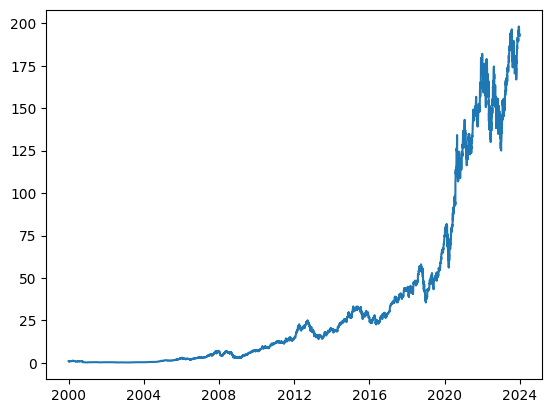

In [116]:
close_price_data["Date"] = pd.to_datetime(close_price_data["Date"])

plt.plot(close_price_data["Date"], close_price_data["Close"])

In [117]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index('Date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(close_price_data, lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
2000-01-12,0.778460,0.828125,0.872768,0.888393,0.848214,0.928571,0.915179,0.999442
2000-01-13,0.863839,0.778460,0.828125,0.872768,0.888393,0.848214,0.928571,0.915179
2000-01-14,0.896763,0.863839,0.778460,0.828125,0.872768,0.888393,0.848214,0.928571
2000-01-18,0.928013,0.896763,0.863839,0.778460,0.828125,0.872768,0.888393,0.848214
2000-01-19,0.951451,0.928013,0.896763,0.863839,0.778460,0.828125,0.872768,0.888393
...,...,...,...,...,...,...,...,...
2023-12-22,193.600006,194.679993,194.830002,196.940002,195.889999,197.570007,198.110001,197.960007
2023-12-26,193.050003,193.600006,194.679993,194.830002,196.940002,195.889999,197.570007,198.110001
2023-12-27,193.149994,193.050003,193.600006,194.679993,194.830002,196.940002,195.889999,197.570007


In [118]:
shifted_df_as_numpy = shifted_df.to_numpy()
print(shifted_df_as_numpy.shape)

(6030, 8)


In [119]:
from sklearn.preprocessing import MinMaxScaler
import joblib

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_numpy)
scaler.fit(shifted_df_as_np)
shifted_df_as_np

joblib.dump(scaler, 'scaler.save')

shifted_df_as_numpy


array([[  0.77846003,   0.828125  ,   0.87276798, ...,   0.92857099,
          0.91517901,   0.99944198],
       [  0.86383897,   0.77846003,   0.828125  , ...,   0.84821397,
          0.92857099,   0.91517901],
       [  0.89676303,   0.86383897,   0.77846003, ...,   0.88839298,
          0.84821397,   0.92857099],
       ...,
       [193.1499939 , 193.05000305, 193.6000061 , ..., 196.94000244,
        195.88999939, 197.57000732],
       [193.58000183, 193.1499939 , 193.05000305, ..., 194.83000183,
        196.94000244, 195.88999939],
       [192.52999878, 193.58000183, 193.1499939 , ..., 194.67999268,
        194.83000183, 196.94000244]])

In [120]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((6030, 7), (6030,))

In [121]:
X = dc(np.flip(X, axis=1))
X

array([[-0.9922663 , -0.99311797, -0.99298262, ..., -0.99338871,
        -0.99354664, -0.99399786],
       [-0.99311797, -0.99298262, -0.99379481, ..., -0.99354664,
        -0.99399786, -0.99449984],
       [-0.99298262, -0.99379481, -0.99338871, ..., -0.99399786,
        -0.99449984, -0.99363688],
       ...,
       [ 0.9945421 ,  0.97756166,  0.98817441, ...,  0.96533169,
         0.95441589,  0.94885681],
       [ 0.97756166,  0.98817441,  0.96684789, ...,  0.95441589,
         0.94885681,  0.94986745],
       [ 0.98817441,  0.96684789,  0.96533169, ...,  0.94885681,
         0.94986745,  0.9542137 ]])

In [122]:
split_index = int(len(X) * 0.95)

split_index

5728

In [123]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5728, 7), (302, 7), (5728,), (302,))

In [124]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5728, 7, 1), (302, 7, 1), (5728, 1), (302, 1))

In [125]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

(TensorShape([5728, 7, 1]),
 TensorShape([302, 7, 1]),
 TensorShape([5728, 1]),
 TensorShape([302, 1]))

In [126]:
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))



In [127]:
batch_size = 16

train_data = train_data.batch(batch_size).shuffle(len(X_train)).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [128]:
for x_batch, y_batch in train_data:
    print(x_batch.shape, y_batch.shape)
    break  # To only process the first batch


(16, 7, 1) (16, 1)


In [129]:
class LSTMModel(tf.keras.Model):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super(LSTMModel, self).__init__()
        self.lstm = tf.keras.layers.LSTM(hidden_size, return_sequences=False,
                                         recurrent_initializer='glorot_uniform',
                                         recurrent_activation='tanh',
                                         stateful=False,
                                         batch_input_shape=(None, input_size))
        self.fc = tf.keras.layers.Dense(1)

    def call(self, x):
        x = self.lstm(x)
        return self.fc(x)

model = LSTMModel(input_size=1, hidden_size=4, num_stacked_layers=1)
model

In [130]:
def train_one_epoch(model, optimizer, loss_function, train_dataset, epoch):
    running_loss = 0.0
    for batch_index, (x_batch, y_batch) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            predictions = model(x_batch, training=True)
            loss = loss_function(y_batch, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        running_loss += loss.numpy()

        if (batch_index + 1) % 100 == 0:
            avg_loss = running_loss / 100
            print(f'Epoch {epoch + 1}, Batch {batch_index + 1}, Loss: {avg_loss:.4f}')
            running_loss = 0.0

In [131]:
def validate_one_epoch(model, loss_function, test_dataset):
    model.trainable = True  # Ensure the model is in evaluation mode
    running_loss = 0.0
    total_batches = 0

    for x_batch, y_batch in test_dataset:
        predictions = model(x_batch, training=False)
        loss = loss_function(y_batch, predictions)
        running_loss += loss.numpy()
        total_batches += 1

    avg_loss = running_loss / total_batches
    print(f'Val Loss: {avg_loss:.3f}')
    print('***************************************************\n')


In [132]:
# Example usage within a training loop
learning_rate = 0.001
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)
loss_function = tf.keras.losses.MeanSquaredError()
num_epochs = 20

for epoch in range(num_epochs):
    train_one_epoch(model, optimizer, loss_function, train_data, epoch)
    validate_one_epoch(model, loss_function, test_data)

Epoch 1, Batch 100, Loss: 0.6916
Epoch 1, Batch 200, Loss: 0.2135
Epoch 1, Batch 300, Loss: 0.0594
Val Loss: 0.822
***************************************************
Epoch 2, Batch 100, Loss: 0.0302
Epoch 2, Batch 200, Loss: 0.0332
Epoch 2, Batch 300, Loss: 0.0409
Val Loss: 0.675
***************************************************
Epoch 3, Batch 100, Loss: 0.0222
Epoch 3, Batch 200, Loss: 0.0238
Epoch 3, Batch 300, Loss: 0.0236
Val Loss: 0.562
***************************************************
Epoch 4, Batch 100, Loss: 0.0215
Epoch 4, Batch 200, Loss: 0.0188
Epoch 4, Batch 300, Loss: 0.0212
Val Loss: 0.469
***************************************************
Epoch 5, Batch 100, Loss: 0.0211
Epoch 5, Batch 200, Loss: 0.0264
Epoch 5, Batch 300, Loss: 0.0060
Val Loss: 0.395
***************************************************
Epoch 6, Batch 100, Loss: 0.0165
Epoch 6, Batch 200, Loss: 0.0102
Epoch 6, Batch 300, Loss: 0.0068
Val Loss: 0.326
**************************************************

179/179 [==============================] - 0s 655us/step


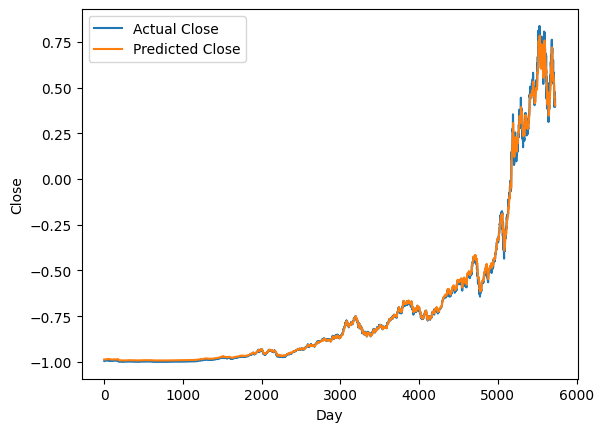

In [133]:
predicted = model.predict(X_train)

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [134]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions



array([-0.98664188, -0.98696983, -0.98679483, ...,  0.41119111,
        0.41436988,  0.40235847])

In [135]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.numpy().flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([-0.99449986, -0.99363691, -0.99330413, ...,  0.44288266,
        0.39628777,  0.43702039])

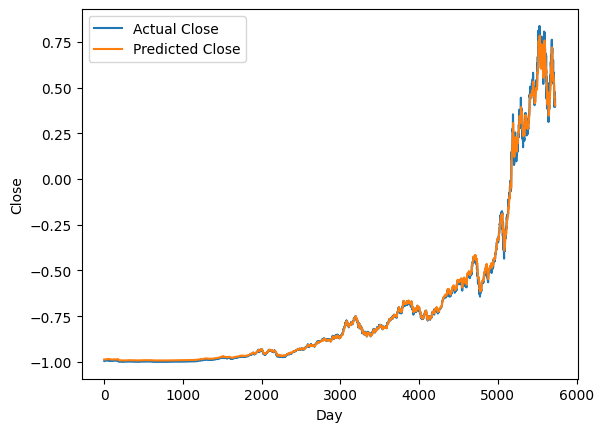

In [136]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [137]:
# Make predictions
test_predictions = model.predict(X_test)

# Flatten predictions
test_predictions = test_predictions.flatten()

# Initialize a zeros array
dummies = np.zeros((X_test.shape[0], lookback + 1))

# Assign predictions to the first column
dummies[:, 0] = test_predictions

# Apply inverse transformation
dummies = scaler.inverse_transform(dummies)

# Extract denormalized predictions
test_predictions = dummies[:, 0]


10/10 [==============================] - 0s 1ms/step


In [138]:
test_predictions

array([0.40542668, 0.41211993, 0.41703877, 0.42117804, 0.43526012,
       0.44719142, 0.466755  , 0.47140509, 0.46517938, 0.49209899,
       0.50111401, 0.50069654, 0.48618042, 0.46010128, 0.44348598,
       0.43371367, 0.41870686, 0.39562654, 0.40937817, 0.42342803,
       0.43439502, 0.45017272, 0.4596746 , 0.47380561, 0.48979566,
       0.48588192, 0.4889448 , 0.49327141, 0.48707476, 0.4747178 ,
       0.45791429, 0.46305719, 0.46487072, 0.46319661, 0.45866024,
       0.44832087, 0.43995506, 0.44057781, 0.43370843, 0.4335593 ,
       0.43443313, 0.42966843, 0.41319954, 0.40045875, 0.38470837,
       0.37261876, 0.36786658, 0.35341841, 0.34343457, 0.33507746,
       0.32132295, 0.32114172, 0.31935632, 0.30457655, 0.29948533,
       0.29150403, 0.29644442, 0.30185434, 0.30491388, 0.31316203,
       0.32222137, 0.33243975, 0.34435639, 0.34930637, 0.35399354,
       0.36370665, 0.37616703, 0.38837177, 0.39574534, 0.40707719,
       0.42109609, 0.4249112 , 0.43184501, 0.43772161, 0.45457

In [139]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.numpy().flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([0.45056421, 0.45167601, 0.44692555, 0.48614213, 0.50817609,
       0.53738636, 0.50716543, 0.46117696, 0.57175142, 0.5474937 ,
       0.52030486, 0.4635016 , 0.40134144, 0.39628777, 0.40174565,
       0.40760794, 0.36081085, 0.48209909, 0.51070291, 0.4963505 ,
       0.51413941, 0.5015052 , 0.52101249, 0.52677357, 0.49362147,
       0.51555443, 0.52455014, 0.49463227, 0.45531467, 0.4244872 ,
       0.49382368, 0.49665371, 0.49160004, 0.47967345, 0.44207406,
       0.42216256, 0.43944606, 0.43449354, 0.45804369, 0.46794885,
       0.4451063 , 0.37728587, 0.35717219, 0.33554247, 0.33483502,
       0.36667314, 0.33412743, 0.33038777, 0.31189129, 0.27156296,
       0.30764621, 0.31088048, 0.2617588 , 0.27479732, 0.26125342,
       0.30774724, 0.31310412, 0.31896639, 0.34686279, 0.3460542 ,
       0.35969904, 0.37162578, 0.36424747, 0.36485389, 0.39113292,
       0.42388079, 0.43823323, 0.4314613 , 0.45268682, 0.47259817,
       0.44298369, 0.45602211, 0.4675445 , 0.52202326, 0.55921

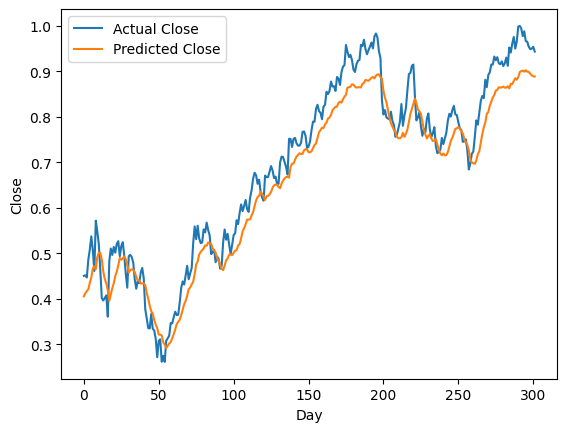

In [140]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
# plt.figure(12.47,11.35)
plt.legend()
plt.show()

In [141]:
from keras.metrics import MeanSquaredError, MeanAbsoluteError

# Assume 'model' is your trained LSTM model, 'x_test' is your test features, and 'y_test' is the actual values.
mse = MeanSquaredError()
mae = MeanAbsoluteError()

# Generate predictions
y_pred = model.predict(X_test)

# Update state of the MSE and MAE with the actual and predicted values
mse.update_state(y_test, y_pred)
mae.update_state(y_test, y_pred)

# Get the result of the MSE and MAE
mse_result = mse.result().numpy()
mae_result = mae.result().numpy()

print(f'MSE: {mse_result}')
print(f'MAE: {mae_result}')

10/10 [==============================] - 0s 1ms/step
MSE: 0.002786206780001521
MAE: 0.045428693294525146


In [142]:
model.compile()

In [143]:
# Save the entire model as a SavedModel.
model.save('../trained_models')  # Replace with the path where you want to save the model


INFO:tensorflow:Assets written to: ../trained_models\assets


INFO:tensorflow:Assets written to: ../trained_models\assets


In [144]:
# To load the model back:
loaded_model = tf.keras.models.load_model("../trained_models")

[*********************100%%**********************]  1 of 1 completed
C:\Users\kw21523\AppData\Local\Temp\ipykernel_14868\219226279.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_price_data["Date"] = pd.to_datetime(close_price_data["Date"])


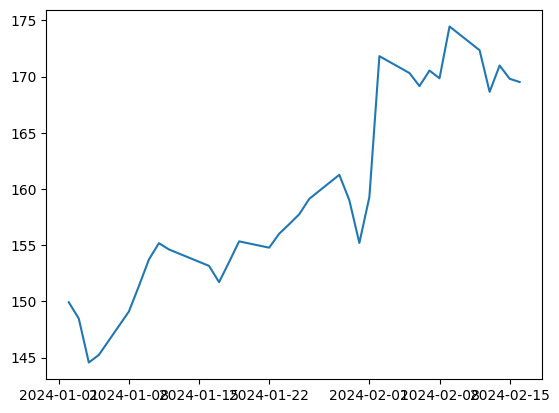

In [145]:
def finding_stock(ticker_symbol, start_date, end_date):
    # # Specify the ticker symbol and the date range
    # ticker_symbol = "AAPL"
    # start_date = "2000-01-01"
    # end_date = "2023-12-30"

    # Fetch historical data
    stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

    stock_data["Date"] = stock_data.index
    stock_data
    #%%
    close_price_data = stock_data[["Date", "Close"]]
    close_price_data
    #%%
    close_price_data["Date"] = pd.to_datetime(close_price_data["Date"])

    plt.plot(close_price_data["Date"], close_price_data["Close"])
    return close_price_data
    
data = finding_stock("AMZN","2024-01-01","2024-02-20")


In [146]:
# def prepare_dataframe_for_lstm(df, n_steps):
#     df_copy = df.copy()
#     df_copy.set_index('Date', inplace=True)
#     for i in range(1, n_steps + 1):
#         df_copy[f'Close(t-{i})'] = df_copy['Close'].shift(i)
#     df_copy.dropna(inplace=True)
#     return df_copy
# 
# def preprocess_data_for_prediction(ticker_symbol, start_date, end_date, lookback, scaler_path):
#     # Fetch historical data
#     stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)
# 
#     # Process the Close price data
#     stock_data['Date'] = stock_data.index
#     close_price_data = stock_data[['Date', 'Close']]
#     close_price_data['Date'] = pd.to_datetime(close_price_data['Date'])
# 
#     # Prepare data for LSTM
#     shifted_df = prepare_dataframe_for_lstm(close_price_data, lookback)
#     
#     shifted_df
#     # Load the fitted scaler
#     scaler = joblib.load(scaler_path) if isinstance(scaler_path, str) else scaler_path
# 
#     # Check if the scaler is indeed MinMaxScaler instance
#     if not isinstance(scaler, MinMaxScaler):
#         raise ValueError("The scaler_path must be a path to a joblib file containing a fitted MinMaxScaler instance.")
#     # 
#     # # Normalize features
#     features = shifted_df.iloc[:, 1:].values  # Exclude the target (first column)
#     features_scaled = scaler.transform(features )
#     print(features_scaled)
#     # Extract target and features
#     X_scaled = np.flip(features_scaled, axis=1)  # Flip columns if needed to match training data
#     y = shifted_df.iloc[:, 0].values
# # 
#     # Reshape data for LSTM
#     X_scaled = X_scaled.reshape((-1, lookback, 1))
#     y = y.reshape((-1, 1))
# 
#     # Convert to tensors
#     X_unseen = tf.convert_to_tensor(X_scaled, dtype=tf.float32)
#     y_unseen = tf.convert_to_tensor(y, dtype=tf.float32)
# 
#     return X_unseen, y_unseen
# # 
# # # Usage example
# scaler_path = 'scaler.save'  # Replace with your actual scaler path
# X_unseen, y_unseen = preprocess_data_for_prediction(
#     ticker_symbol="AAPL",
#     start_date="2024-01-01",
#     end_date="2024-02-20",
#     lookback=7,
#     scaler_path=scaler_path
# )
# 
# X_unseen.shape

In [147]:
def preprocess_unseen_data(ticker_symbol, start_date, end_date, lookback):
    # Fetch historical data
    stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

    # Process the Close price data
    stock_data['Date'] = stock_data.index
    close_price_data = stock_data[['Date', 'Close']]
    close_price_data['Date'] = pd.to_datetime(close_price_data['Date'])

    # Prepare data for LSTM
    shifted_df = prepare_dataframe_for_lstm(close_price_data, lookback)
    shifted_df_as_np = shifted_df.to_numpy()

    scaler = MinMaxScaler(feature_range=(-1, 1))
    shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)
    # Split features and target
    X = shifted_df_as_np[:, 1:]
    y = shifted_df_as_np[:, 0]

    # Reshape data for LSTM
    X = np.flip(X, axis=1).reshape((-1, lookback, 1))
    y = y.reshape((-1, 1))

    # Convert to tensors
    X_unseen = tf.convert_to_tensor(X, dtype=tf.float32)
    Y_unseen = tf.convert_to_tensor(y, dtype=tf.float32)
    
    joblib.dump(scaler, "scaler1.save")

    return X_unseen, Y_unseen

In [148]:
ticker_symbol = "AMZN"
start_date = "2024-01-01"
end_date = "2024-03-01"
lookback = 7  # Assuming lookback of 7
scaler = MinMaxScaler(feature_range=(-1, 1))  # Initialize the scaler with the range used during training

# You need to fit the scaler on your training data before using it here
# scaler.fit(your_training_data)

X_unseen, Y_unseen = preprocess_unseen_data(ticker_symbol, start_date, end_date, lookback)

[*********************100%%**********************]  1 of 1 completed
C:\Users\kw21523\AppData\Local\Temp\ipykernel_14868\3940902832.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_price_data['Date'] = pd.to_datetime(close_price_data['Date'])


In [149]:
Y_unseen.shape

TensorShape([34, 1])

In [150]:
loaded_model.evaluate(X_unseen, Y_unseen)

2/2 [==============================] - 0s 0s/step - loss: 0.0000e+00


0.0

In [151]:
predictions = loaded_model.predict(X_unseen)

2/2 [==============================] - 0s 7ms/step


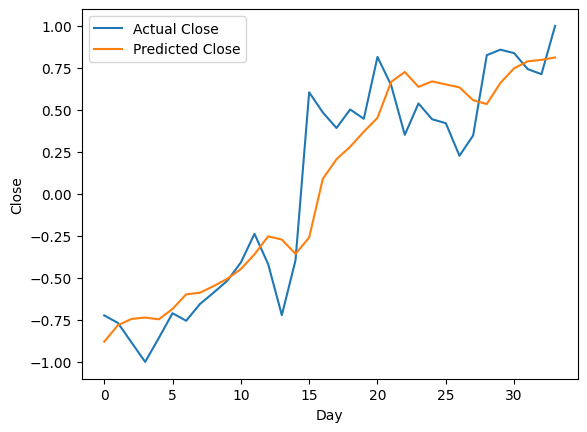

In [152]:

plt.plot(Y_unseen, label='Actual Close')
plt.plot(predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [153]:
# Assume 'model' is your trained LSTM model, 'x_test' is your test features, and 'y_test' is the actual values.
mse = MeanSquaredError()
mae = MeanAbsoluteError()

# Generate predictions
y_pred = model.predict(X_unseen)

# Update state of the MSE and MAE with the actual and predicted values
mse.update_state(Y_unseen, y_pred)
mae.update_state(Y_unseen, y_pred)

# Get the result of the MSE and MAE
mse_result = mse.result().numpy()
mae_result = mae.result().numpy()

print(f'MSE: {mse_result}')
print(f'MAE: {mae_result}')

2/2 [==============================] - 0s 0s/step
MSE: 0.06385671347379684
MAE: 0.18748441338539124


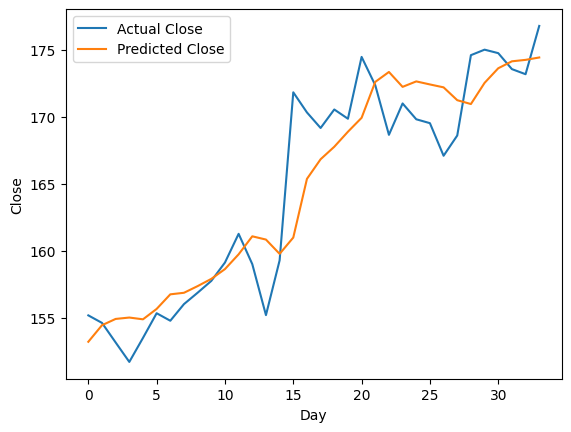

In [154]:
# Load the saved scaler
scaler = joblib.load('scaler1.save')

# Flatten predictions
test_predictions = predictions.flatten()

# Initialize a zeros array
dummies = np.zeros((X_unseen.shape[0], lookback + 1))

# Assign predictions to the first column
dummies[:, 0] = test_predictions

# Apply inverse transformation
denormalized_predictions = scaler.inverse_transform(dummies)[:, 0]

# Extract the actual (denormalized) close values
dummies = np.zeros((Y_unseen.shape[0], lookback + 1))
dummies[:, 0] = Y_unseen.numpy().flatten()
denormalized_actual_close = scaler.inverse_transform(dummies)[:, 0]


# You can now use denormalized_predictions to plot the true results
plt.plot(denormalized_actual_close, label='Actual Close')
plt.plot(denormalized_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()
